# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [2]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd
from typing import Tuple
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from numpy import ndarray
import matplotlib.pyplot as plt
from tabulate import tabulate
import csv

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [ ]:
def run_perceptron_defaults(data_file: str) -> Tuple[Perceptron, ndarray, ndarray]:
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)

  # load evaluation data
  Data_Set = arff.loadarff(data_file)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]

  # train on the evaluation data
  clf.fit(X, y)

  return clf, X, y

In [ ]:
clf, X, y = run_perceptron_defaults('debug.arff')

print(clf.coef_)        # final weights
print(clf.intercept_)   # final bias weight
print(clf.score(X, y))  # accuracy

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.01 seconds.
--

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [ ]:
clf, X, y = run_perceptron_defaults('banknote_authentication.arff')

# print your accuracy and weights. Do not enter these values by hand.
print(clf.coef_)        # final weights
print(clf.intercept_)   # final bias weight
print(clf.score(X, y))  # accuracy

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

*Discussion:
- I decided to create a method run_perceptron_defaults with the same settings from part 1.1. I put it above 1.1 to avoid duplicate code.
- It starts by creating a Perceptron object to run the algorithm. This object comes from the Scikit-Learn Python library. Arguments include disabling shuffling, whichimportant becasue to get deterministic results - for testing. Verbose is set to 1 which prints an output summary of training after each Epoch. eta0 is set to 0.1 which is the learning rate. max_iter is set to 10, so the algorithm will run for 10 epochs, regardless of whether is is done training or not.
- Next, we load the arff file using the Scikit-Learn loadarff method. We then convert it to a Pandas dataframe. Note that the argument passed to pd.DataFrame uses index 0, which is the index of an arff object that contains the data (while index 1 contains the metadata). Next, we convert the set to a NumPy array, and convert the data to floats.
- Next, we extract the X (input values), and y (target values). The syntax [:, :-1] retrieves every row, and all but the last column, which are the input values. The syntax [:, -1] retrieves every row, and just the last column, which is the target values.
- clf.fit(X, y) is what actually runs the alrogithm on the Perceptron object we created before loading the arff file.
- Finally, the function returns the trained Perceptron classifier object, as well as X and y.
- After returning from the function, we print the final weights, final bias weight, and the accuracy.
- We can see that the final accuracy was 97.67%, so after training, performance on specifically the data it was trained on was almost perfect. I imagine that the fact that it didn't quite achieve 100% accuracy has to do with two things. First it considers convergence within a threshhold. Second, I imagine that the banknote data isn't 100% linearly seperable, so the small outliers also cause the accuracy to drop some.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [ ]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

# (1) linearly seperable (by y = -x + 4)
X1 = np.array([[0,0],[0,3],[1,2],[3,0],[0,5],[2,3],[3,2],[5,0]])
y1 = np.array([0,0,0,0,1,1,1,1])

#(2) NOT linearly seperable (same as above EXCEPT 0,0 yields 1 so it is no longer seperable)
X2 = np.array([[0,0],[0,3],[1,2],[3,0],[0,5],[2,3],[3,2],[5,0]])
y2 = np.array([1,0,0,0,1,1,1,1])

Discussion:
- I created the two datasets to be mostly the same except the second dataset was modified to have a single point (0, 0) make it no longer linearly seperable. The first dataset could be separated by the line y = -x + 4. But in the second, that separation no longer works because I make the (0, 0) yield 1.

### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [ ]:
def run_perceptron_no_max_iter(X: ndarray, y: ndarray) -> None:
  clf = Perceptron(shuffle=True, verbose=1, eta0=0.01)

  # train on the evaluation data
  clf.fit(X, y)

  print(clf.coef_)        # final weights
  print(clf.intercept_)   # final bias weight
  print(clf.score(X, y))  # accuracy

In [ ]:
# Train and print results with both datasets
print("Running with linearly seperable data")
run_perceptron_no_max_iter(X1, y1)

print("Running with NON linearly seperable data")
run_perceptron_no_max_iter(X2, y2)

Running with linearly seperable data
-- Epoch 1
Norm: 0.01, NNZs: 2, Bias: -0.020000, T: 8, Avg. loss: 0.046250
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 1, Bias: -0.020000, T: 16, Avg. loss: 0.020000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 2, Bias: -0.020000, T: 24, Avg. loss: 0.032500
Total training time: 0.01 seconds.
-- Epoch 4
Norm: nan, NNZs: 1, Bias: -0.050000, T: 32, Avg. loss: 0.028750
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 2, Bias: -0.050000, T: 40, Avg. loss: 0.036250
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 2, Bias: -0.060000, T: 48, Avg. loss: 0.025000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 2, Bias: -0.070000, T: 56, Avg. loss: 0.016250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 2, Bias: -0.070000, T: 64, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 2, Bias: -0.070000, T: 72, Avg. loss: 0.000000
T

*Discussion*
- I trained the model using each of my custom datasets, modified the parameters. I didn't use a max_iter, so it defaulted to 1,000, and I set shuffle to True so it would shuffle the data in between each epoch. Additionally, I initially had the learning rate set to 0.1, but I noticed that my linearly seperable dataset wasn't achieving 100% accuracy for linearly-seperable data. I then narrowed it down to 0.01, and that did the trick.
- The results are as expected. When the model was trained on linearly-seperable data, it achieved 100% accuracy when tested. Something that is important to note is that this won't always be the case, but since my training data was the same as the testing data, the model had been perfectly trained for the data it was tested on and was able to perform perfectly.
- For the non-linearly seperable data, the accuracy was only 50%, which means as good as flipping a coin. Poor accuracy was expected because the line derived by the weights after training can't possibly devide the data into two categories. However, the reason that it wasn't at least a little better than this is discussed (probably because a local maxima was found) in 2.3 after revealing the graphs.
- Looking at the final weights, it is interesting that the final bias weight for the linearly seperable dataset was shifted more than the other weights. I imagine this is due to the fact that the bias was throwing off the perceptron quite a bit at the beginning, so required significant adjustment, while the two regular weights were each adjusted by only 0.02 meaning that the two inputs had a fairly even impact in making an accurate prediction.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

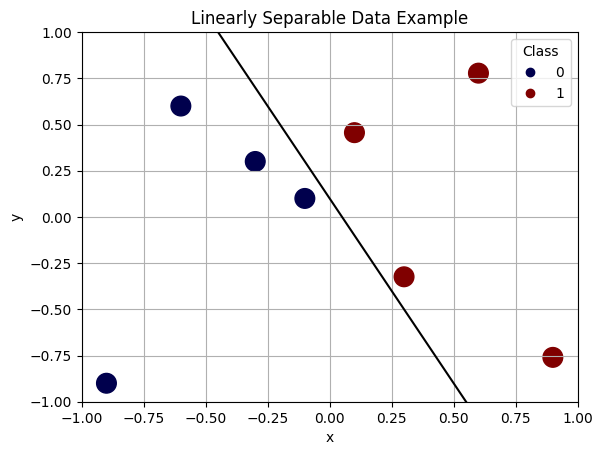

In [ ]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

In [ ]:
# Graph datasets and decision lines for both cases.

'''
MATH:
x2 = (-w1/w2)x1 + -bias/w2
Y = MX + B
so M = (-w1/w2) and B = -bias/w2 (bias referres to the final bias weight)
'''
def graph(data: ndarray, labels: ndarray, w1: float, w2: float, bias: float, title: str): # bias is final bias weight
  # Create a scatter plot of data
  plt.xlim(0,6)
  plt.ylim(0,6)
  scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
  legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right')

  # Plot the learned separator.
  xlist = np.linspace(-1.0, 4.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
  ylist = np.linspace(-1.0, 4.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
  slope = -w1/w2        # computed above
  intercept = -bias/w2  # computed above
  eq = slope*xlist + intercept
  plt.plot(xlist,  eq, '-k', )
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid() # add grid lines
  plt.show() # show the plot


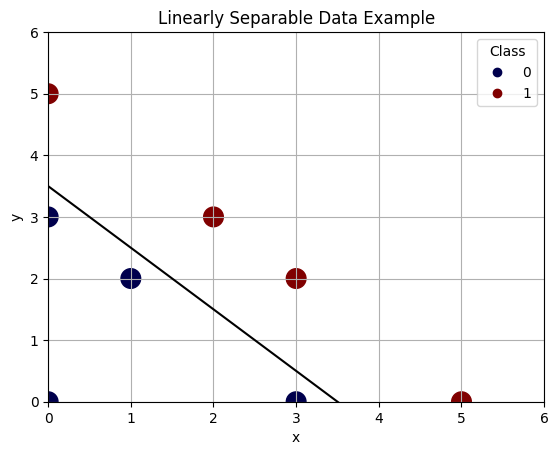

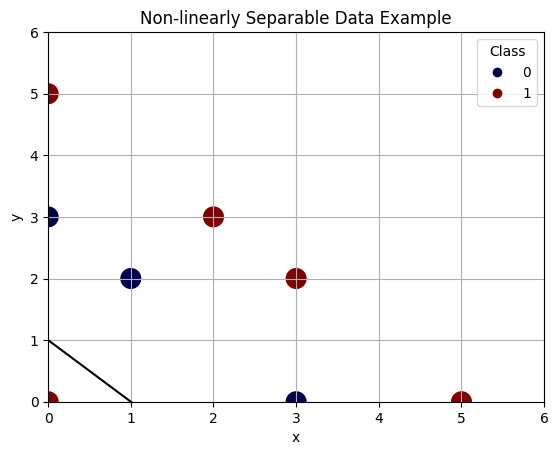

In [ ]:
# linearly separable weights: [[0.02 0.02]], and bias: [-0.07]
graph(data=X1, labels=y1, w1=0.02, w2=0.02, bias=-0.07, title='Linearly Separable Data Example')

# non-linearly separable weights: [[0.01 0.01]], and bias: [-0.01]
graph(data=X2, labels=y2, w1=0.01, w2=0.01, bias=-0.01, title='Non-linearly Separable Data Example')

*Discussion*
- To derive the slope and y-intercept, I did the following math. We know that `x2 = (-w1/w2)x1 + -bias/w2`, and that this cooresponds to `Y = MX + B`. Therefore, we can extract M and B to be `(-w1/w2)` and `-bias/w2`, respectively. Note that bias referres to the final bias weight rather than the starting bias value.
- Graphing the data was fairly insightful. For the linearly separable data, the resulting line was as I predicted. Since the data was linearly separable, the line perfectly divides the two classes. Of course, if there were more data points, this line may have been adjusted even further.
- The non-linearly separable line was even more insightful. Looking at it, you can see that it simply divides the first red dot at 0, 0 from the line of blue dots. It would have been more accurate if the line instead moved upward to divide the line of three blue dots from the line of four red dots. However, I believe what happened was that a local maxima was found, and the algorithm wasn't able to make the jump over the blue dots.
  - A potential strategy to resolve this issue would by to use a varying learning rate. It would be good to start with a big learning rate, and then narrow it as time goes on. This is a common solution for avoiding local maxima and finding a better maxima to then exploit.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*
- Perceptrons typically won't get perfect accuracy on non-linearly separable data because of the nature of linear separability. The idea is to be able to draw a line between the two classes. Everything on one side of the line is class A, and the other side contains class B. However, if it isn't linearly separable, it means that it is impossible to draw a line between the two. No matter where you draw a line, at least one point will be on the side of the other class.
- The example graph above is a good example of this. Since a single red dot appears to the left of the line of blue dots, the Perceptron was unable to create a line to perfectly divide the red and blue dots, so accuracy was poor.
- In some cases, you can still get fairly good accuracy, when the line divides the classes in a distribution that is "good enough". What is "good enough" depends on the use case, though in every case, the goal is to have a better division that what would just be random.
- It is also sometimes possible to use different features that better promote linear separability. If the current input features aren't yielding linear separability, another set may be better.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [88]:
def load_data(file_name: str) -> Tuple[ndarray, ndarray]:
  Data_Set = arff.loadarff(file_name)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  X = np.where(X == b'y', 1, 0) # n: 0, y: 1
  y = np.where(y == b'republican', 1, 0) # democrat: 0, republican: 1

  return X, y

In [89]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

# load data
X, y = load_data('voting-dataset.arff')

# run Perceptron 5 times
table = []
for i in range(1, 6):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # split data
  clf = Perceptron(shuffle=True, verbose=0, eta0=1) # initialize Perceptron
  clf.fit(X_train, y_train) # train

  table.append([i, clf.score(X_train, y_train), clf.score(X_test, y_test), clf.n_iter_])

# add row of averages
averages = ["Average", 0, 0, 0]
for i in range(len(table)):
  for j in range(1, 4):
    averages[j] += table[i][j]
for i in range(1, 4):
  averages[i] /= len(table)
table.append(averages)

# print table
headers = ["Trial", "Training Accuracy", "Test Accuracy", "Number of Epochs"]
print(tabulate(table, headers=headers))

Trial      Training Accuracy    Test Accuracy    Number of Epochs
-------  -------------------  ---------------  ------------------
1                   0.947205         0.913669                   9
2                   0.968944         0.935252                  10
3                   0.968944         0.942446                   9
4                   0.97205          0.935252                  15
5                   0.950311         0.928058                   7
Average             0.961491         0.930935                  10


Discussion:
- A more thorough discussion of this data is in point 3.2 (just below this).
- The results seem fairly as expected. I split the data to use 30% for testing and 70% with training. The chart shows that scoring with the training data averaged ~96% accuracy, while scoring with the test set averaged ~93%. In each trial, the Perceptron was trained on none of the test set, so it wasn't guaranteed that the test values had been taken into account. Therefore, scoring with test data averaged ~3% loss in accuracy. In a real-world scenario, the accuracy is more likely to follow the ~93% accuracy score from the test set.

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [15]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning
X, y = load_data('voting-dataset.arff') # load data
clf = Perceptron(shuffle=True, verbose=0, eta0=1) # initialize Perceptron
clf.fit(X, y) # train

print(clf.coef_)        # final weights
print(clf.intercept_)   # final bias weight


[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
[-9.]


Discuss how the different features effect prediction:  
[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]  
[-9.]
- Printing the clf.coef_ yields the final weights, and printing the clf.intercept_ yields the final bias weight. There are 16 variables plus the bias weight.
- There are a couple of important things to look at when looking at the final weight:
  - The magnitude (absolute value) tells us how important that the weight was in determining the classification. For example, the 4th weight cooresponds to `physician-fee-freeze`, and has the highest magnitude of all the weights. This means that an individual's take on that issue is very impactful for determining if they are Democrat or Republican. The 11th issue is `synfuels-corporation-cutback`, and has a weight of -10. The magnitude of that is 10, and it has the 2nd highest magnitude. This means that it was also very important. The first weight cooresponds to `handicapped-infants`, and since its weight is 0, it means that this is not a strong deciding factor for being a Republican or a Democrat. This suggests that both parties have similar views on this issue. The 14th attribute is `crime`, and since it also has a weight of 0, it succests that the view on crime is also not particularly helpful for classifying an individual's political party. The bias has a magnitude of 9 (third largest), so it suggests that this is leaning the decision in one direction quite a bit. I will discuss which direction in the next paragraph.
  - The direction (positive or negative) also tells a lot about the importance of the input. If the weight is positive, having the attribute makes the individual more likely to be of classification 1 (Republican), and vice versa with a negative value making the individual more likely to be a 0 (Democrat). Going back to the examples from the last point, since the weight cooresponding to `physician-fee-freeze` is positive, having this position makes the individual more likely to be a Republican, but since the weight for `synfuels-corporation-cutback` is negative, having this position makes the individual more likely to be a Democrat. The same concept applies to all the other weights. Since the bias is in the negative direction, it is biasing the data moreso towards the Democrat classification.

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [16]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

def get_num_epochs(X: ndarray, y: ndarray, seed: int, learning_rate: float, shuffle: bool) -> int:
  clf = Perceptron(shuffle=True, verbose=0, eta0=learning_rate, random_state=seed) # initialize Perceptron
  clf.fit(X, y)

  return clf.n_iter_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

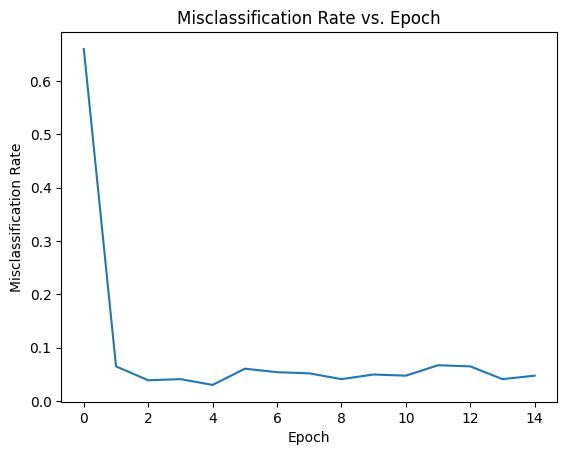

In [20]:
X, y = load_data('voting-dataset.arff') # load data
seed, learning_rate, shuffle = 7, 0.1, True
n_epochs = get_num_epochs(X, y, seed, learning_rate, shuffle) # get # epochs (using seed)
rates = [0.66]
clf = Perceptron(shuffle=shuffle, verbose=0, eta0=learning_rate, max_iter=1, warm_start=True, random_state=seed)
for i in range(n_epochs):
  clf.fit(X, y)
  rates.append(1.0 - clf.score(X, y))

plot_misclassification(rates)

*Show table and discuss*
- The process to create the graph was fairly simple. I created a function called get_num_epochs() which returns the number of epochs for the Perceptron to run to convergence. I then run a new Perceptron, one epoch at a time, and add the resulting error to a list that is used to create the graph. To ensure that both Perceptrons (the one to count epochs, and the one to iterate through epochs one at a time), I use the random_state parameter and set both to the same value. In this case, I set the seed to 7. I use te warm_start, and max_iter parameters to allow iterating through the results one at a time.
- The results are fairly as predicted. After the first epoch, you can see that the error rate improved significantly. It is interesting to note that after the first epoch, the misclassificate rate jumps up and down quite a bit, and doesn't really improve. My hypothesis on why that happens is that there are a couple of factors. First, I am using the same set of data for both training and testing. Due to this, even after the first iteration, the misclassification rate is low because every test point has already been seen during training. There are no new training sets that the Perceptron has to account for during future iterations. In epochs after the first, the training dataset is exactly the same, and while shuffle is set to true, there's not a whole lot of variety to allow it to really improve. I believe that is why, as it converges, it really doesn't become more accurate. If I had used cross validation or random validation, I believe that this would have seen more steady improvement due to more variety between training epochs.

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [21]:
# Run the model with different hyperparameters
X, y = load_data('voting-dataset.arff') # load data


def run(clf: Perceptron, name: str):
  print("  " + name + ":")
  clf.fit(X, y)
  print("    ", clf.coef_)        # final weights
  print("    ", clf.intercept_)   # final bias weight
  print("    ", clf.score(X, y))  # accuracy


# shuffle
print("shuffle")
run(Perceptron(shuffle=True), "True 1")
run(Perceptron(shuffle=False), "True 2")
run(Perceptron(shuffle=True), "False 1")
run(Perceptron(shuffle=False), "False 2")

# eta0
print("\n\neta0")
run(Perceptron(eta0=0.001), "eta0=0.001")
run(Perceptron(eta0=0.01), "eta0=0.01")
run(Perceptron(eta0=0.1), "eta0=0.1")
run(Perceptron(eta0=1), "eta0=1")
run(Perceptron(eta0=10), "eta0=10")

# verbose
print("\n\nverbose")
run(Perceptron(verbose=0), "verbose=0")
run(Perceptron(verbose=1), "verbose=1")

# fit_intercept
print("\n\nfit_intercept")
run(Perceptron(fit_intercept=True), "fit_intercept=True")
run(Perceptron(fit_intercept=False), "fit_intercept=False")

# random_state
print("\n\nrandom_state")
run(Perceptron(random_state=1, shuffle=True), "random_state=1")
run(Perceptron(random_state=2, shuffle=True), "random_state=2")
run(Perceptron(random_state=2, shuffle=True), "random_state=2")

# warm_start
print("\n\nwarm_start")
clf = Perceptron(warm_start=True, max_iter=3, random_state=1)
run(clf, "warm_start=True - 1st run")
run(clf, "warm_start=True - 2nd run")
run(clf, "warm_start=True - 3rd run")
clf.warm_start = False
run(clf, "warm_start set to False - 4th run")


shuffle
  True 1:
     [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
     [-9.]
     0.9609544468546638
  True 2:
     [[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
     [-9.]
     0.9674620390455532
  False 1:
     [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
     [-9.]
     0.9609544468546638
  False 2:
     [[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
     [-9.]
     0.9674620390455532


eta0
  eta0=0.001:
     [[-0.001 -0.001 -0.008  0.016  0.002 -0.002  0.005  0.007 -0.006  0.002
  -0.008  0.001  0.001 -0.001 -0.005  0.002]]
     [-0.006]
     0.9631236442516269
  eta0=0.01:
     [[-0.02 -0.01 -0.07  0.15  0.02 -0.01  0.02  0.07 -0.07  0.02 -0.09  0.03
   0.01  0.01 -0.04  0.04]]
     [-0.05]
     0.9457700650759219
  eta0=0.1:
     [[-1.00000000e-01 -2.00000000e-01 -8.00000000e-01  1.60000000e+00
   2.00000000e-01 -3.00000000e-01  7.00000000e-01  6.0000000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Discussion

shuffle  
- The shuffle parameter determines whether or not to shuffle the data in between each epoch during training. For my tests, I ran the Perceptron four times on the voting dataset, twice with shuffle set to True, and twice with it set to False. In this test, I noticed that the results varied from each training. I wasn't able to notice any patterns between shuffling vs not shuffling, but I believe this is due to my limited amount of tests. On problem 2.2, for running the Perceptron on linearly separable data, I noticed that shuffle did make a different. When I had it turned off, I was only able to achieve about 60% accuracy. However, when I turned it on, I achieved 100% accuracy, and that was expected because the data was linearly separable and the test set was the same as the training set.

eta0  
- The eta0 is the learning rate, which determines how quickly the algorithm learns with each set up inputs that it evaluates. For my experimentation, I tested the Perceptron on the voting dataset with eta0 values from 0.001 up to 10. It was interesting to see that each increase of the eta0 value by 10x also increased the weights on average by 10. This is however, fairly arbitrary, because the weights can be normalized. All the test sets performed about the same (~96%) and I believe that is due to the fact that the test set is relatively small. I thing that if there was a larger test set, adjusting the eta0 would make more of a difference in the final output.

verbose  
- verbose can be set to 0 or 1, and if it is a 1, it means that it will pring extra output after each epoch. The info is in this format:  
`-- Epoch 1  
Norm: 14.28, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.305857  
Total training time: 0.00 seconds.`  
- The meaning of the parameters is explained above. As a summary of each parameter, Norm shows the sum of weight magnitudes in the current model. NNZs is the count of non-zero weight magnitudes in the current model but it doesn't include the bias. The Bias is the current bias weight. T is the number of weight updates that have been counted during training so far. Avg. loss is a specific measure of error, though I don't know exactly how it is calculated.

fit_intercept
- fit_intercept determines whether or not to include a bias term in the Perceptron. I ran two perceptrons, one with it on and one with it off. I'm not surprised that it made a difference, but I am surprised by how much of a difference having a bias made. With the bias, the accuracy was ~96%, and without, the accuracy was ~93%, which means that adding a bias term reduced the misclassification rate by half.

random_state
- random_state is essentially a seed for shuffling the inputs between epochs. To test this, I ran three Perceptrons, one with a random state of 1 and the other two with a random state of 2. The two with the same random state produced the exact same output, and the one with a unique random state produced unique results. This functionality is as expected.

warm_start
- when warm_start is true, it won't reset the state each time you call fit(). This means that you can partially train a Perceptron, pause to do evaluations, and continue training it later, including the ability to change out data. For my tests, I called fit() on a Perceptron 3 times with warm_start set to True, then set it to False and ran it again. For the first three calls, the results varied each time becasue the model continued to be refined. However, when I ran it the fourth time after setting warm_start to False, the results were the same as after the first call. This is because it reset the state before running for the fourth time.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [19]:
# Load and Train on your dataset and report results
def load_data(file_name: str) -> Tuple[ndarray, ndarray]:
  # load csv file
  with open('iris.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

  # convert to numby array, and extract X and y
  data = np.array(data)
  X = data[:, :-1]
  y = data[:, -1:]
  X = X.astype(float)
  y = np.where(y == 'Iris-virginica', 1, 0)

  return X, y

In [30]:
X, y = load_data('iris.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # split data
clf = Perceptron(verbose=1, eta0=0.1, random_state=6)
clf.fit(X_train, y_train)
print(clf.coef_)        # final weights
print(clf.intercept_)   # final bias weight
print(clf.score(X_test, y_test))  # accuracy

clf.fit(X, y)
print(clf.coef_)        # final weights
print(clf.intercept_)   # final bias weight
print(clf.score(X, y))  # accuracy

-- Epoch 1
Norm: 2.07, NNZs: 4, Bias: -0.400000, T: 105, Avg. loss: 0.699952
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.31, NNZs: 4, Bias: -0.400000, T: 210, Avg. loss: 0.372800
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.83, NNZs: 4, Bias: -0.500000, T: 315, Avg. loss: 0.460324
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.96, NNZs: 4, Bias: -0.500000, T: 420, Avg. loss: 0.129400
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 3.68, NNZs: 4, Bias: -0.700000, T: 525, Avg. loss: 0.561410
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.58, NNZs: 4, Bias: -0.900000, T: 630, Avg. loss: 0.582362
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.08, NNZs: 4, Bias: -1.000000, T: 735, Avg. loss: 0.434476
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.41, NNZs: 4, Bias: -1.100000, T: 840, Avg. loss: 0.520495
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 6.11, NNZs: 4, Bias: -1.300000, T: 945, Avg. loss: 0.390286
Total training time: 0.01 s

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Discuss how the perceptron did on the data set and why you think it performed as such.*
- I downloaded the Iris dataset from the UC Irvine repository. Because the data was in a CSV file instead of an ARFF file, loading it was a little different. I used `open` to open the CSV file, read and converted the data to a list, and then converted the list into a NumPy array. I then extracted X (all cols except last) and y (just the last col) from the array for inputs and targets.
- The target data originally had three classifications: (1) Iris-setosa, (2) Iris-versicolor, and (3) Iris-virginica. Because Perceptron is a binary classifier, I decided to classify data sets as either Iris-verginica or other. To do this, I modified the y series to swap out any value containing 'Iris-virginica' for a 1 and anything else to a 0.
- Before training, I divided the data into a test set and a training set, using 30% of the data for testing and 70% for training.
- The results were not very surprising. The final accuracy was 86%, though I did run it multiple times, and got a range of accuracies (ranging from ~60% to 100%). The reason for this variance is that I only split my data once. Because of this, so much of the accuracy was dependent on the luck of how the test set was divided.
- I also fitted a Perceptron to the data using all the data as the training set, and scored it using all the data as the test set. This yielded 98.6% accuracy, which was expected because all the data it was tested on had also been used for training so there were no surprises. Again, the reason that the results were not 100% accurate is due to the fact that this set is not 100% linearly separable, so some inputs lied on the wrong side of the classification line.

## 5. (Optional 15% extra credit) Code up your own perceptron learner

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [57]:
def get_np_from_arff(data_file: str):
  Data_Set = arff.loadarff(data_file)
  Data_Set_df = pd.DataFrame(Data_Set[0])

  return Data_Set_df.to_numpy()

def load_debug_arff() -> Tuple[ndarray, ndarray]:
  # load evaluation data
  Data_Set_np = get_np_from_arff('debug.arff')
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]

  return X, y

def load_voting_arff() -> Tuple[ndarray, ndarray]:
  Data_Set_np = get_np_from_arff('voting-dataset.arff')
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  X = np.where(X == b'y', 1, 0) # n: 0, y: 1
  y = np.where(y == b'republican', 1, 0) # democrat: 0, republican: 1

  return X, y

In [84]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import shuffle
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True, tol=.001):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.tol = tol

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # insert bias weight (1's in last col)
        X = np.insert(X, X.shape[1], 1, axis=1)
        self.weights = self.initialize_weights(X) if not initial_weights else initial_weights

        # compute epochs until 3 consequtive epochs have no weight change greater than TOL
        n_epochs_below_tol, n_epochs = 0, 0
        while n_epochs_below_tol < 3 and n_epochs < 100:
            # run epoch
            max_change = self.run_epoch(X, y)

            # prepare for next epoch
            n_epochs += 1
            n_epochs_below_tol = n_epochs_below_tol + 1 if max_change < self.tol else 0
            if self.shuffle:
              X, y = shuffle(X, y)

        return self

    def predict(self, X: ndarray):
        """
            Predicts all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array: Predicted target values per element in X.
        """
        # insert bias weight (1's in last col)
        X = np.insert(X, X.shape[1], 1, axis=1)

        # get predictions
        n_rows = X.shape[0]
        out = np.zeros(n_rows)
        for row in range(n_rows):
            net = np.dot(X[row, :], self.weights)
            out[row] = 1 if net > 0 else 0

        return out

    def initialize_weights(self, X: ndarray):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        n_inputs = X.shape[1]

        return np.zeros(n_inputs)

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        z_arr = self.predict(X)

        sum = 0.0
        for i in range(len(y)):
            sum += 1 if y[i] == z_arr[i] else 0

        return sum / len(y)

    def run_epoch(self, X: ndarray, y: ndarray) -> float:
        '''Return max weight update from the epoch'''
        n_rows, n_cols = X.shape[0], X.shape[1]
        # visit each row
        max_change = 0.0
        for row in range(n_rows):
            net = np.dot(X[row, :], self.weights)
            z = 1 if net > 0 else 0

            # update weights using curr row
            for col in range(n_cols):
                # delta_w = c(t - z)x_i
                delta_w = (self.lr * (y[row] - z) * X[row, col]).item()

                max_change = max(max_change, delta_w)
                self.weights[col] += delta_w

        return max_change

    def get_weights(self):
        '''Return the weights and bias'''
        return self.weights

In [92]:
# debug.arff Test
X, y = load_debug_arff()

clf = PerceptronClassifier(lr=.1, shuffle=False)
clf.fit(X, y)
print("Final weights (including bias): ", str(clf.get_weights()))
print(clf.score(X, y))

Final weights (including bias):  [-0.24  0.2  -0.1 ]
1.0


In [90]:
# voting-dataset.arff Test
X, y = load_voting_arff()

clf = PerceptronClassifier(lr=1, shuffle=True)
clf.fit(X, y)
print("Final weights (including bias): ", str(clf.get_weights()))
print(clf.score(X, y))

Final weights (including bias):  [ -3.  -2.  -8.  17.   5.   0.   6.  10.  -9.   5. -10.   0.   3.  -1.
  -6.   2. -13.]
0.96529284164859


Discussion:
- I implemented my Perceptron using the scafhold code. To implement it, I reviewed the Perceptron homework from last week, and simply followed the same procedure. I tested my implementation using 2 epochs of a simple set that I worked out on paper, and all variables were the same.
- I ran my Perceptron on two other datasets. The first was `debug.arff`. Like in 1.1 (above), I used shuffle=False. While my results were not exactly the same, they were very close (Scikit Perceptron: -.23, .2, -.1, My Perceptron: -.23, .18, -.1). I imagine that this slight variation could have to do with different stopping criteria (both may not have run the same # of epochs). It could also have to do with different weight initialization (I initialize to 0's). Regardless, because the data was linearly separable and training did work properly, the final accuracy was 100%.
- The second data set that I ran my Perceptron on was the `voting-dataset.arff`. After training, I scored the model using the training dataset and achieved 96.52% accuracy. This is significant because this was actually slightly better (though overall performing almost identically) than the 96.14% (average over 5 trials) that the Scikit-Learn Perceptron scored in 3.1 (also scoring with the training dataset).
- Looking at weights, I can see that the same features were significant as were after training on the Skikit-Learn perceptron. For example, `physician-fee-freeze` scored a 17 indicating that having this feature makes an individual very likely to be a Republican. Additionally, `synfuels-corporation-cutback` scored -10 which indicates that having this viewpoint makes an individual more likely to be a Democrat. Both of these weights are the same values that the Scikit-Learn Perceptron produced.